# Random Forest

A **Random Forest** is an ensemble machine learning algorithm commonly used for classification and regression tasks. It operates by constructing multiple decision trees during training and aggregating their predictions to improve accuracy and reduce overfitting.

## Key Features
1. **Ensemble Method**: Combines multiple decision trees to reduce variance and bias.
2. **Bagging**: Uses bootstrap aggregating to create subsets of the data for each tree.
3. **Feature Randomness**: Selects a random subset of features for each tree split, increasing diversity among the trees.
4. **Voting or Averaging**:
   - For classification: Uses majority voting.
   - For regression: Averages predictions from all trees.

## Benefits
- Handles both classification and regression tasks.
- Resistant to overfitting with proper parameter tuning.
- Performs well with large datasets and high-dimensional data.
- Can handle missing values and outliers effectively.

## Limitations
- Slower for large datasets compared to simpler models.
- Requires parameter tuning (e.g., number of trees, max depth) for optimal performance.
- Less interpretable compared to a single decision tree.

## Applications
- Fraud detection
- Risk assessment
- Medical diagnosis
- Predictive maintenance in manufacturing
- Marketing analysis

## Hyperparameters to Tune
1. **`n_estimators`**: Number of trees in the forest (more trees improve accuracy but increase computation time).
2. **`max_depth`**: Maximum depth of each tree to control overfitting.
3. **`min_samples_split`**: Minimum number of samples required to split a node.
4. **`min_samples_leaf`**: Minimum number of samples required in a leaf node.
5. **`max_features`**: Number of features considered at each split.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



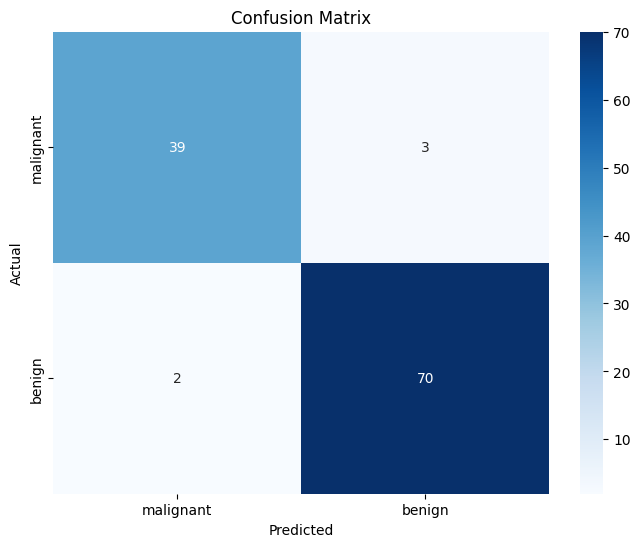

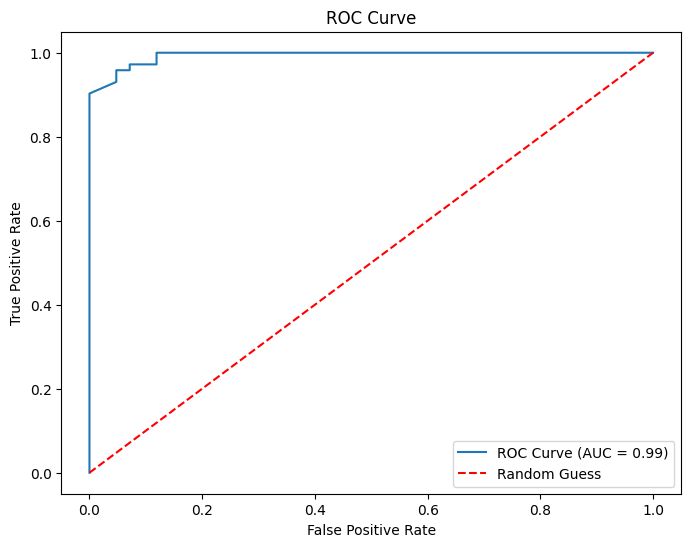

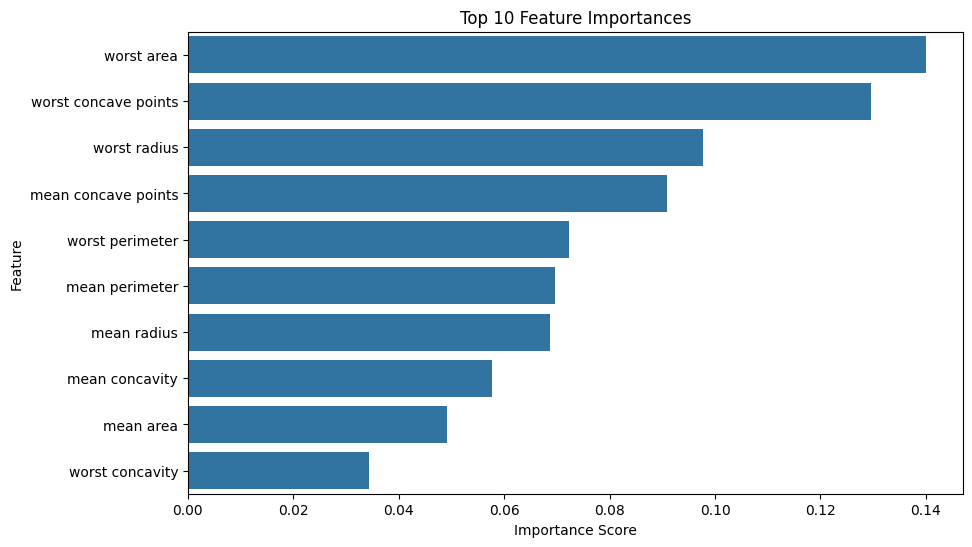

Top 10 Feature Importances:
                 Feature  Importance
23            worst area    0.140016
27  worst concave points    0.129530
20          worst radius    0.097696
7    mean concave points    0.090885
22       worst perimeter    0.072226
2         mean perimeter    0.069574
0            mean radius    0.068676
6         mean concavity    0.057638
3              mean area    0.049172
26       worst concavity    0.034340


In [5]:
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=data.target_names, columns=data.target_names)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Display Feature Importances (Optional: print all)
print("Top 10 Feature Importances:")
print(feature_importances.head(10))
